In [3]:
# import tensorflow as tf
# import tensorflow_hub as hub
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt 
import base64
from PIL import Image
import io
import math 
from math import sqrt


%matplotlib inline

# global embed
# embed = hub.KerasLayer(os.getcwd())


In [2]:
print(tf.__version__)

1.15.0


In [3]:
print(hub.__version__)

0.7.0


In [4]:
import cv2

In [5]:
for x in os.listdir("."):
    print(x)

.ipynb_checkpoints
assets
Convert txt file to json.ipynb
DATAFILE.xlsx
Hindi OCR Detection
Hindi OCR Detection of data from PDF to EXCEL.ipynb
Offline Signature Verification.ipynb
Perform TF-IDF, identify keywords calculate cosine similarity from pdf..ipynb
saved_model.pb
sign1.png
sign2.png
sign3.png
sign4.png
Validate gstins from mongo database.ipynb
variables


In [13]:
class TensorVector(object):

    def __init__(self, FileName=None):
        self.FileName = FileName

    def process(self):

        img = tf.io.read_file(self.FileName)
        img = tf.io.decode_jpeg(img, channels=3)
        img = tf.image.resize_image_with_pad(img, 224, 224)
        img = tf.image.convert_image_dtype(img,tf.float32)[tf.newaxis, ...]
        print(type(img))
        print(img)
        features = embed(img)
        with tf.compat.v1.Session() as sess:
            sess.run(tf.global_variables_initializer())
            result = sess.run(features)
            feature_set = np.squeeze(result)
            print(feature_set)
        return list(feature_set)

In [22]:
helper = TensorVector("pic1.jpg")
vector1 = helper.process()
len(vector1)

<class 'tensorflow.python.framework.ops.Tensor'>
Tensor("strided_slice_8:0", shape=(1, 224, 224, 3), dtype=float32)
[0.152945   1.6521535  0.7748809  ... 0.         0.03957734 0.10745107]


1280

In [23]:
helper = TensorVector("pic2.jpg")
vector2 = helper.process()
len(vector2)

<class 'tensorflow.python.framework.ops.Tensor'>
Tensor("strided_slice_9:0", shape=(1, 224, 224, 3), dtype=float32)
[0.34372595 2.9066012  0.07810421 ... 0.         0.         0.08889853]


1280

In [8]:
def convertBase64(FileName):
    """
    Return the Numpy array for a image 
    """
    with open(FileName, "rb") as f:
        data = f.read()
        
    res = base64.b64encode(data)
    
    base64data = res.decode("UTF-8")
    
    imgdata = base64.b64decode(base64data)
    
    image = Image.open(io.BytesIO(imgdata))
    
    return np.array(image)

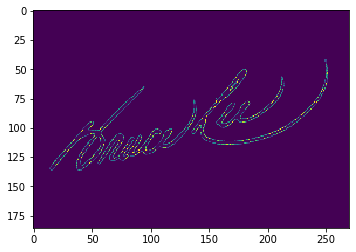

In [10]:
# image1 = cv2.resize(convertBase64("sign1.png"),(100,100))
image1=convertBase64("sign1.png")
image1.shape
plt.imshow(image1)

In [19]:
image2=convertBase64("sign2.png")
image2.shape
# plt.imshow(image2)

(110, 457)

In [12]:
# plt.imshow(convertBase64("sign3.png"))
image2=convertBase64("sign4.png")
image2.shape

(96, 450)

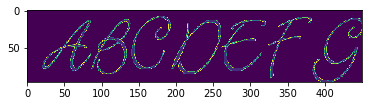

In [32]:
plt.imshow(convertBase64("sign4.png"))

In [18]:
def cosineSim(a1,a2):
    sum = 0
    suma1 = 0
    sumb1 = 0
    for i,j in zip(a1, a2):
        suma1 += i * i
        sumb1 += j*j
        sum += i*j
    cosine_sim = sum / ((sqrt(suma1))*(sqrt(sumb1)))
    return cosine_sim

In [24]:
cosineSim(vector1, vector2)

0.8377129235753008

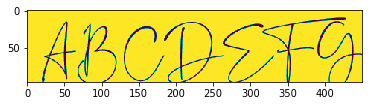

In [34]:
# from imageio import imread
# import cv2
image = imread("sign3.png")
# image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

In [35]:
image = cv2.resize(image,(100,100))
image=image.astype(np.float32)
image

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)

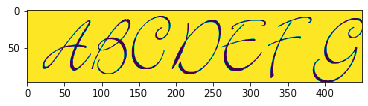

In [36]:
image1 = imread("sign4.png")
# image1=cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 
plt.imshow(image1)
image1 = cv2.resize(image1,(100,100))
image1=image1.astype(np.float32)
image1

In [37]:
image1.shape
type(image)

numpy.ndarray

In [40]:
similarity = caltheta(image.flatten(),image1.flatten())
similarity

-0.9467995219498845

In [39]:
def caltheta(A, B):
    ab = A.dot(B)
    aa = A.dot(A)
    bb = B.dot(B)
    return -ab / sqrt(aa*bb)

In [29]:
# a_norm = np.linalg.norm(image, axis=1)
# type(a_norm)
# b_norm = np.linalg.norm(image1, axis=1)
# (image @ image1) / (a_norm * b_norm)

numpy.ndarray